# DS project Group-12
    
    V.V.S.N.SAI MOHAN (20275) 
    B.HEMANTH(20215)
    M.VISHAL REDDY(20248)
    S.MANIKANTA(20268)
    B.JAGADANANDA(20217)
    K.NAVEEN KUMAR(20238)

### About the Dataset

- The dataset contains date,location where the crime had occured from 2012-2021.
- It contains 3 datetime attributes.
- It also contains many object data types.
- Here 'OFFENSE' is the target variable.

# Importing all the packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Combining all the datasets

In [2]:
df1 = pd.read_csv('Crime_Incidents_in_2012.csv')
df2 = pd.read_csv('Crime_Incidents_in_2013.csv')
df3 = pd.read_csv('Crime_Incidents_in_2014.csv')
df4 = pd.read_csv('Crime_Incidents_in_2015.csv')
df5 = pd.read_csv('Crime_Incidents_in_2016.csv')
df6 = pd.read_csv('Crime_Incidents_in_2017.csv')
df7 = pd.read_csv('Crime_Incidents_in_2018.csv')
df8 = pd.read_csv('Crime_Incidents_in_2019.csv')
df9 = pd.read_csv('Crime_Incidents_in_2020.csv')
df0 = pd.read_csv('Crime_Incidents_in_2021.csv')

In [3]:
crime=list()
crime.append(df1.shape[0])
crime.append(df2.shape[0])
crime.append(df3.shape[0])
crime.append(df4.shape[0])
crime.append(df5.shape[0])
crime.append(df6.shape[0])
crime.append(df7.shape[0])
crime.append(df8.shape[0])
crime.append(df9.shape[0])
crime.append(df0.shape[0])
year=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

In [4]:
# COLUMN_NAMES = ['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK',
#                  'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA','NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
#                  'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE','END_DATE', 'OBJECTID']
# df = pd.DataFrame(columns=COLUMN_NAMES)
# df =pd.concat([df1,df2, df3,df4,df5,df6,df7,df8,df9,df0],ignore_index =True)

In [5]:
# df.to_csv('data.csv',index=False)

## Loading Data Set

In [6]:
df=pd.read_csv('data.csv')

In [7]:
df.shape

(321671, 25)

In [8]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [9]:
df.head(3)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,...,010600 2,10600.0,Precinct 83,38.901916,-76.999516,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,NaN
1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,...,010600 1,10600.0,Precinct 83,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,NaN
2,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.0,135316.0,...,007703 3,7703.0,Precinct 107,38.885672,-76.948894,NaN,2011-07-17T02:28:00.000Z,NaN,167293017,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321671 entries, 0 to 321670
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     321671 non-null  float64
 1   Y                     321671 non-null  float64
 2   CCN                   321671 non-null  int64  
 3   REPORT_DAT            321671 non-null  object 
 4   SHIFT                 321671 non-null  object 
 5   METHOD                321671 non-null  object 
 6   OFFENSE               321671 non-null  object 
 7   BLOCK                 321671 non-null  object 
 8   XBLOCK                321671 non-null  float64
 9   YBLOCK                321671 non-null  float64
 10  WARD                  321663 non-null  float64
 11  ANC                   321671 non-null  object 
 12  DISTRICT              321304 non-null  float64
 13  PSA                   321279 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  318828 non-null  object 
 15  

# Data Pre-Prosessing

> ## **DUPLICATE AND MISSING VALUES**

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

X                            0
Y                            0
CCN                          0
REPORT_DAT                   0
SHIFT                        0
METHOD                       0
OFFENSE                      0
BLOCK                        0
XBLOCK                       0
YBLOCK                       0
WARD                         8
ANC                          0
DISTRICT                   367
PSA                        392
NEIGHBORHOOD_CLUSTER      2843
BLOCK_GROUP                680
CENSUS_TRACT               680
VOTING_PRECINCT             47
LATITUDE                     0
LONGITUDE                    0
BID                     266509
START_DATE                   6
END_DATE                 16173
OBJECTID                     0
OCTO_RECORD_ID          321671
dtype: int64

In [13]:
df.drop(['BID'],axis=1,inplace=True)
# having more than 75% null values

In [14]:
df.shape

(321671, 24)

In [15]:
df.isnull().sum()

X                            0
Y                            0
CCN                          0
REPORT_DAT                   0
SHIFT                        0
METHOD                       0
OFFENSE                      0
BLOCK                        0
XBLOCK                       0
YBLOCK                       0
WARD                         8
ANC                          0
DISTRICT                   367
PSA                        392
NEIGHBORHOOD_CLUSTER      2843
BLOCK_GROUP                680
CENSUS_TRACT               680
VOTING_PRECINCT             47
LATITUDE                     0
LONGITUDE                    0
START_DATE                   6
END_DATE                 16173
OBJECTID                     0
OCTO_RECORD_ID          321671
dtype: int64

> Dropping the null valued rows

In [16]:
df.dropna(subset=['WARD','DISTRICT','PSA','NEIGHBORHOOD_CLUSTER','BLOCK_GROUP','CENSUS_TRACT','VOTING_PRECINCT','START_DATE','END_DATE'],how='any',inplace=True)

In [17]:
df.isnull().sum()

X                            0
Y                            0
CCN                          0
REPORT_DAT                   0
SHIFT                        0
METHOD                       0
OFFENSE                      0
BLOCK                        0
XBLOCK                       0
YBLOCK                       0
WARD                         0
ANC                          0
DISTRICT                     0
PSA                          0
NEIGHBORHOOD_CLUSTER         0
BLOCK_GROUP                  0
CENSUS_TRACT                 0
VOTING_PRECINCT              0
LATITUDE                     0
LONGITUDE                    0
START_DATE                   0
END_DATE                     0
OBJECTID                     0
OCTO_RECORD_ID          301656
dtype: int64

In [18]:
df.shape

(301656, 24)

In [19]:
df['VOTING_PRECINCT'].head()

0     Precinct 83
1     Precinct 83
3    Precinct 134
4     Precinct 92
5      Precinct 5
Name: VOTING_PRECINCT, dtype: object

In [20]:
df['NEIGHBORHOOD_CLUSTER'].head()

0    Cluster 25
1    Cluster 25
3    Cluster 36
4    Cluster 29
5     Cluster 4
Name: NEIGHBORHOOD_CLUSTER, dtype: object

> ### Removing "Precinct" and "Cluster" from each record of VOTIING_PRECINCT and NEIGHBORHOOD_CLUSTER..

In [21]:
df['VOTING_PRECINCT']=df['VOTING_PRECINCT'].str.replace('Precinct ','').astype(int)

In [22]:
df['NEIGHBORHOOD_CLUSTER']=df['NEIGHBORHOOD_CLUSTER'].str.replace('Cluster ','').astype(int)

In [23]:
df['VOTING_PRECINCT'].head()

0     83
1     83
3    134
4     92
5      5
Name: VOTING_PRECINCT, dtype: int32

In [24]:
df['NEIGHBORHOOD_CLUSTER'].head()

0    25
1    25
3    36
4    29
5     4
Name: NEIGHBORHOOD_CLUSTER, dtype: int32

> ### Values in column X and Y is same as that of the column LATITUDE and LONGITUDE. So we can remove X and Y.

In [25]:
df.drop(['X','Y'],axis=1,inplace=True)

In [26]:
df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,6.0,6C,...,25,010600 2,10600.0,83,38.901916,-76.999516,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,NaN
1,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,6.0,6C,...,25,010600 1,10600.0,83,38.905024,-76.995538,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,NaN
3,11141272,2012-06-25T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2800 - 2899 BLOCK OF BUENA VISTA TERRACE SE,402815.0,131990.0,8.0,8B,...,36,007502 2,7502.0,134,38.855717,-76.967568,2011-09-26T06:45:00.000Z,2011-09-26T06:55:00.000Z,167296016,NaN
4,11158196,2012-01-05T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,4280 - 4499 BLOCK OF DOUGLAS STREET NE,405237.0,138096.0,7.0,7D,...,29,009601 1,9601.0,92,38.910711,-76.939618,2011-10-27T18:35:00.000Z,2011-10-27T00:00:00.000Z,167299077,NaN
5,12005414,2012-01-11T18:52:00.000Z,EVENING,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF 32ND STREET NW,394480.0,138000.0,2.0,2E,...,4,000100 3,100.0,5,38.909844,-77.063644,2012-01-11T13:00:00.000Z,2012-01-11T13:46:00.000Z,167301753,NaN


> ### Also dates are represented as object type, it should be converted into datetime datatype.

In [27]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [28]:
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [29]:
df['REPORT_DAT']=pd.to_datetime(df['REPORT_DAT'])

> ### About target variable

In [30]:
df['OFFENSE'].unique()

array(['SEX ABUSE', 'HOMICIDE', 'THEFT/OTHER',
       'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY', 'THEFT F/AUTO',
       'MOTOR VEHICLE THEFT', 'BURGLARY', 'ARSON'], dtype=object)

In [31]:
# Import label encoder
from sklearn import preprocessing as pp

offense_encoder = pp.LabelEncoder()
df['OFFENSE']=offense_encoder.fit_transform(df['OFFENSE'])

In [32]:
df['OFFENSE'].head()

0    6
1    6
3    3
4    3
5    8
Name: OFFENSE, dtype: int32

In [33]:
# df=df[df.OFFENSE!=4]
# df=df[df.OFFENSE!=5]
# df=df[df.OFFENSE!=6]
# df=df[df.OFFENSE!=7]
# df=df[df.OFFENSE!=8]
# df['OFFENSE'].unique()

array([3, 1, 2, 0])

> ### Same like that convert BLOCK,ANC columns to int32

In [35]:
df['BLOCK'].unique().size

8475

In [36]:
block_encoder = pp.LabelEncoder()
df['BLOCK']=block_encoder.fit_transform(df['BLOCK'])

anc_encoder = pp.LabelEncoder()
df['ANC']=anc_encoder.fit_transform(df['ANC'])

In [37]:
df['BLOCK'].head()

3     3735
4     5578
6     5059
19     693
28     877
Name: BLOCK, dtype: int32

In [38]:
df['ANC'].head()

3     36
4     32
6     34
19    23
28    23
Name: ANC, dtype: int32

In [39]:
df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
3,11141272,2012-06-25 00:00:00+00:00,MIDNIGHT,OTHERS,3,3735,402815.0,131990.0,8.0,36,...,36,007502 2,7502.0,134,38.855717,-76.967568,2011-09-26 06:45:00+00:00,2011-09-26 06:55:00+00:00,167296016,NaN
4,11158196,2012-01-05 00:00:00+00:00,MIDNIGHT,OTHERS,3,5578,405237.0,138096.0,7.0,32,...,29,009601 1,9601.0,92,38.910711,-76.939618,2011-10-27 18:35:00+00:00,2011-10-27 00:00:00+00:00,167299077,NaN
6,12005415,2012-01-11 19:05:00+00:00,EVENING,GUN,1,5059,404441.0,135894.0,7.0,34,...,32,009603 2,9603.0,102,38.890879,-76.948810,2012-01-11 19:00:00+00:00,2012-01-11 19:05:00+00:00,167301754,NaN
19,12005611,2012-01-12 08:20:00+00:00,DAY,OTHERS,2,693,401115.0,137767.0,5.0,23,...,23,008804 1,8804.0,76,38.907762,-76.987145,2012-01-12 08:20:00+00:00,2012-01-12 08:20:00+00:00,167301767,NaN
28,12005658,2012-01-12 10:11:00+00:00,DAY,OTHERS,2,877,401310.0,137764.0,5.0,23,...,23,008804 1,8804.0,78,38.907734,-76.984896,2012-01-12 10:00:00+00:00,2012-01-12 10:03:00+00:00,167301776,NaN


> ### One Hot Encoding SHIFT and METHOD using get_dummies() function. It will create new columns with value 0 and 1 only.

In [40]:
df['SHIFT'].unique()

array(['MIDNIGHT', 'EVENING', 'DAY'], dtype=object)

In [41]:
df['METHOD'].unique()

array(['OTHERS', 'GUN', 'KNIFE'], dtype=object)

In [42]:
shift_encoder = pp.LabelEncoder()
df['SHIFT']=shift_encoder.fit_transform(df['SHIFT'])

met_encoder = pp.LabelEncoder()
df['METHOD']=met_encoder.fit_transform(df['METHOD'])

In [43]:
df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
3,11141272,2012-06-25 00:00:00+00:00,2,2,3,3735,402815.0,131990.0,8.0,36,...,36,007502 2,7502.0,134,38.855717,-76.967568,2011-09-26 06:45:00+00:00,2011-09-26 06:55:00+00:00,167296016,NaN
4,11158196,2012-01-05 00:00:00+00:00,2,2,3,5578,405237.0,138096.0,7.0,32,...,29,009601 1,9601.0,92,38.910711,-76.939618,2011-10-27 18:35:00+00:00,2011-10-27 00:00:00+00:00,167299077,NaN
6,12005415,2012-01-11 19:05:00+00:00,1,0,1,5059,404441.0,135894.0,7.0,34,...,32,009603 2,9603.0,102,38.890879,-76.948810,2012-01-11 19:00:00+00:00,2012-01-11 19:05:00+00:00,167301754,NaN
19,12005611,2012-01-12 08:20:00+00:00,0,2,2,693,401115.0,137767.0,5.0,23,...,23,008804 1,8804.0,76,38.907762,-76.987145,2012-01-12 08:20:00+00:00,2012-01-12 08:20:00+00:00,167301767,NaN
28,12005658,2012-01-12 10:11:00+00:00,0,2,2,877,401310.0,137764.0,5.0,23,...,23,008804 1,8804.0,78,38.907734,-76.984896,2012-01-12 10:00:00+00:00,2012-01-12 10:03:00+00:00,167301776,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38358 entries, 3 to 321665
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   CCN                   38358 non-null  int64              
 1   REPORT_DAT            38358 non-null  datetime64[ns, UTC]
 2   SHIFT                 38358 non-null  int32              
 3   METHOD                38358 non-null  int32              
 4   OFFENSE               38358 non-null  int32              
 5   BLOCK                 38358 non-null  int32              
 6   XBLOCK                38358 non-null  float64            
 7   YBLOCK                38358 non-null  float64            
 8   WARD                  38358 non-null  float64            
 9   ANC                   38358 non-null  int32              
 10  DISTRICT              38358 non-null  float64            
 11  PSA                   38358 non-null  float64            
 12  NEI

> ### Now here block group is only object left , should convert it to int.

In [45]:
df['BLOCK_GROUP'].unique().size

636

In [46]:
bg_encoder = pp.LabelEncoder()
df['BLOCK_GROUP']=bg_encoder.fit_transform(df['BLOCK_GROUP'])

In [47]:
df['BLOCK_GROUP'].head()

3     401
4     538
6     543
19    486
28    486
Name: BLOCK_GROUP, dtype: int32

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38358 entries, 3 to 321665
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   CCN                   38358 non-null  int64              
 1   REPORT_DAT            38358 non-null  datetime64[ns, UTC]
 2   SHIFT                 38358 non-null  int32              
 3   METHOD                38358 non-null  int32              
 4   OFFENSE               38358 non-null  int32              
 5   BLOCK                 38358 non-null  int32              
 6   XBLOCK                38358 non-null  float64            
 7   YBLOCK                38358 non-null  float64            
 8   WARD                  38358 non-null  float64            
 9   ANC                   38358 non-null  int32              
 10  DISTRICT              38358 non-null  float64            
 11  PSA                   38358 non-null  float64            
 12  NEI

> ### Successfully all the features converted to int,float,datetime
 *Now should remove unwanted features like CCN, strat_date, end_date,OBJECTID. Because we dont want CCN,OBJECTID and also instead of two dates we have another feature report_date.*

In [49]:
df.drop(['CCN','START_DATE','END_DATE','OBJECTID'],axis=1,inplace=True)

> ### *Report date converted to month,day day of week.*

In [50]:
df['MONTH']=df['REPORT_DAT'].dt.month
df['DAY']=df['REPORT_DAT'].dt.day
df['Day_Week']=df['REPORT_DAT'].dt.dayofweek
df.drop('REPORT_DAT',axis=1,inplace=True)

## Final DataSet

> ### Data Summarization

In [51]:
df.head()

,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,OCTO_RECORD_ID,MONTH,DAY,Day_Week
3,2,2,3,3735,402815.0,131990.0,8.0,36,7.0,702.0,36,401,7502.0,134,38.855717,-76.967568,NaN,6,25,0
4,2,2,3,5578,405237.0,138096.0,7.0,32,6.0,601.0,29,538,9601.0,92,38.910711,-76.939618,NaN,1,5,3
6,1,0,1,5059,404441.0,135894.0,7.0,34,6.0,603.0,32,543,9603.0,102,38.890879,-76.948810,NaN,1,11,2
19,0,2,2,693,401115.0,137767.0,5.0,23,5.0,506.0,23,486,8804.0,76,38.907762,-76.987145,NaN,1,12,3
28,0,2,2,877,401310.0,137764.0,5.0,23,5.0,506.0,23,486,8804.0,78,38.907734,-76.984896,NaN,1,12,3


In [52]:
df.shape

(38358, 20)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38358 entries, 3 to 321665
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SHIFT                 38358 non-null  int32  
 1   METHOD                38358 non-null  int32  
 2   OFFENSE               38358 non-null  int32  
 3   BLOCK                 38358 non-null  int32  
 4   XBLOCK                38358 non-null  float64
 5   YBLOCK                38358 non-null  float64
 6   WARD                  38358 non-null  float64
 7   ANC                   38358 non-null  int32  
 8   DISTRICT              38358 non-null  float64
 9   PSA                   38358 non-null  float64
 10  NEIGHBORHOOD_CLUSTER  38358 non-null  int32  
 11  BLOCK_GROUP           38358 non-null  int32  
 12  CENSUS_TRACT          38358 non-null  float64
 13  VOTING_PRECINCT       38358 non-null  int32  
 14  LATITUDE              38358 non-null  float64
 15  LONGITUDE         

In [54]:
df.drop(['OCTO_RECORD_ID'],axis=1,inplace=True)

In [55]:
df.iloc[0]

SHIFT                        2.000000
METHOD                       2.000000
OFFENSE                      3.000000
BLOCK                     3735.000000
XBLOCK                  402815.000000
YBLOCK                  131990.000000
WARD                         8.000000
ANC                         36.000000
DISTRICT                     7.000000
PSA                        702.000000
NEIGHBORHOOD_CLUSTER        36.000000
BLOCK_GROUP                401.000000
CENSUS_TRACT              7502.000000
VOTING_PRECINCT            134.000000
LATITUDE                    38.855717
LONGITUDE                  -76.967568
MONTH                        6.000000
DAY                         25.000000
Day_Week                     0.000000
Name: 3, dtype: float64

# Data Visualization

> ## This histogram shows that until 2018, there is not much difference in crime rate. After that there is large decrease in crime rate and it is increasing each year.

<BarContainer object of 10 artists>

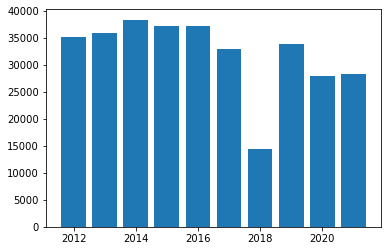

In [56]:
c = pd.Series(crime)
y = pd.Series(year)
plt.bar(y, c,)

## correlation heat map

<AxesSubplot:>

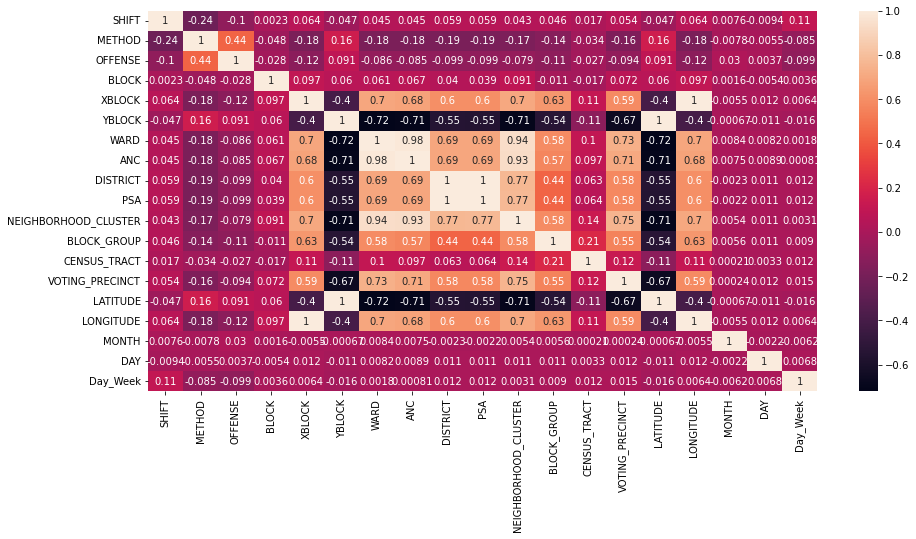

In [57]:
plt.figure(figsize=[15,7])
sb.heatmap(df.corr(), annot=True)

> ## APPLYING K-MEANS CLUSTERING TO FIND AREA WHERE CRIME IS MOST LIKELY TO OCCUR.

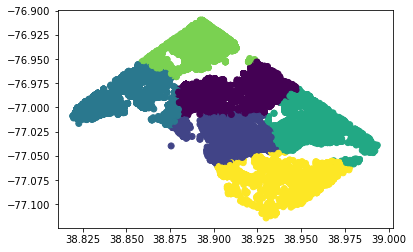

In [58]:
from sklearn.cluster import KMeans
data = list(zip(df['LATITUDE'].values, df['LONGITUDE'].values))
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

plt.scatter(df['LATITUDE'], df['LONGITUDE'], c=kmeans.labels_)
plt.show()

> ## Important feature using ExtraTreesRegressor

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
X = df.drop('OFFENSE',axis=1)
y = df['OFFENSE']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

> ## plot graph of feature importances for 6 better visualization


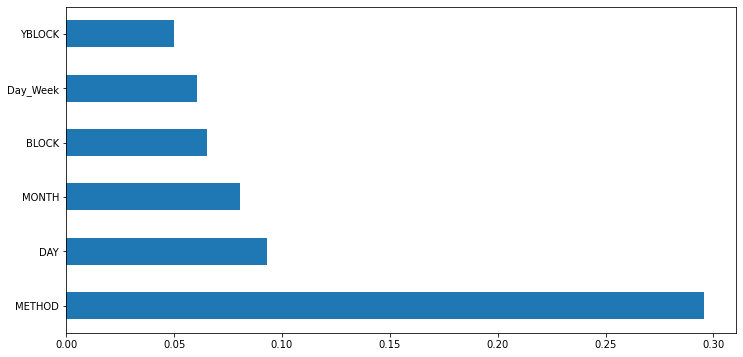

In [60]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [61]:
print(feat_importances.sort_values(ascending=False))

METHOD                  0.295593
DAY                     0.092954
MONTH                   0.080703
BLOCK                   0.065128
Day_Week                0.060787
YBLOCK                  0.050063
LATITUDE                0.050008
LONGITUDE               0.049848
XBLOCK                  0.049827
SHIFT                   0.044893
BLOCK_GROUP             0.034276
VOTING_PRECINCT         0.026371
CENSUS_TRACT            0.024260
PSA                     0.021760
ANC                     0.021302
NEIGHBORHOOD_CLUSTER    0.017108
WARD                    0.008112
DISTRICT                0.007008
dtype: float64


In [62]:
df=df[['METHOD','DAY','BLOCK','Day_Week','LONGITUDE','XBLOCK','ANC','PSA','NEIGHBORHOOD_CLUSTER','OFFENSE']]
df

,METHOD,DAY,BLOCK,Day_Week,LONGITUDE,XBLOCK,ANC,PSA,NEIGHBORHOOD_CLUSTER,OFFENSE
3,2,25,3735,0,-76.967568,402815.000000,36,702.0,36,3
4,2,5,5578,3,-76.939618,405237.000000,32,601.0,29,3
6,0,11,5059,2,-76.948810,404441.000000,34,603.0,32,1
19,2,12,693,3,-76.987145,401115.000000,23,506.0,23,2
28,2,12,877,3,-76.984896,401310.000000,23,506.0,23,2
...,...,...,...,...,...,...,...,...,...,...
321603,0,7,6651,1,-76.925616,406452.641412,31,608.0,31,1
321609,0,7,205,1,-76.951410,404215.590000,34,603.0,32,1
321623,2,18,6408,5,-77.021593,398127.740000,0,409.0,2,2
321637,0,24,1126,4,-76.986906,401135.800000,25,104.0,25,1


> ### NORMALIZATION

In [63]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
sd = df[df.columns.drop('OFFENSE')]
scaled = df[sd.columns]  
scaler = MinMaxScaler()
scaler.fit(scaled)     
#Fit the scaler using available training data:For normalization, this means the training data will be used to estimate the minimum and maximum observable values. 
#This is done by calling the fit() function.
scaled = scaler.transform(scaled)#using transform() function, you can use the normalized data to train your model.
print(scaled)

[[1.         0.8        0.44075997 ... 0.92307692 0.99011532 0.77777778]
 [1.         0.13333333 0.65824876 ... 0.82051282 0.82372323 0.62222222]
 [0.         0.33333333 0.5970026  ... 0.87179487 0.82701812 0.68888889]
 ...
 [1.         0.56666667 0.75619542 ... 0.         0.50741351 0.02222222]
 [0.         0.76666667 0.13287704 ... 0.64102564 0.00494234 0.53333333]
 [0.5        0.03333333 0.93403351 ... 0.46153846 0.49917628 0.37777778]]


> ### STANDARDIZATION

In [64]:
from sklearn.preprocessing import StandardScaler
#Create the Scaler
scaler = StandardScaler()
#Apply the scaler to the normalized data to standardize it
scaled = scaler.fit_transform(scaled)
#Printing after standardizing
print(scaled)
scaled_df=pd.DataFrame(scaled)
scaled_df.describe()
scaled_df.columns=sd.columns
scaled_df['OFFENSE']=df['OFFENSE']

[[ 0.68294712  1.03140205 -0.04205686 ...  1.04479178  1.22420586
   1.11005233]
 [ 0.68294712 -1.23858791  0.75382405 ...  0.70309388  0.70957824
   0.52190443]
 [-1.86522521 -0.55759092  0.52969915 ...  0.87394283  0.71976889
   0.77396782]
 ...
 [ 0.68294712  0.23690557  1.11225116 ... -2.03048927 -0.26872375
  -1.74666604]
 [-1.86522521  0.91790256 -1.16872712 ...  0.10512257 -1.82279724
   0.18581992]
 [-0.59113905 -1.5790864   1.76303386 ... -0.49284875 -0.29420037
  -0.40232798]]


In [65]:
df=scaled_df
df.isnull().sum()

METHOD                      0
DAY                         0
BLOCK                       0
Day_Week                    0
LONGITUDE                   0
XBLOCK                      0
ANC                         0
PSA                         0
NEIGHBORHOOD_CLUSTER        0
OFFENSE                 31862
dtype: int64

> ### After scaling, it will be getting null values so we should fill them with mean values.

In [66]:
df['OFFENSE']=df['OFFENSE'].fillna(df['OFFENSE'].mean())

In [67]:
df['OFFENSE']=df['OFFENSE'].astype(int)

In [68]:
df

,METHOD,DAY,BLOCK,Day_Week,LONGITUDE,XBLOCK,ANC,PSA,NEIGHBORHOOD_CLUSTER,OFFENSE
0,0.682947,1.031402,-0.042057,-1.453613,0.771752,0.772180,1.044792,1.224206,1.110052,1
1,0.682947,-1.238588,0.753824,0.042903,1.535986,1.535693,0.703094,0.709578,0.521904,1
2,-1.865225,-0.557591,0.529699,-0.455936,1.284653,1.284762,0.873943,0.719769,0.773968,1
3,0.682947,-0.444091,-1.355714,0.042903,0.236486,0.236271,-0.065726,0.225523,0.017778,3
4,0.682947,-0.444091,-1.276255,0.042903,0.297958,0.297743,-0.065726,0.225523,0.017778,3
...,...,...,...,...,...,...,...,...,...,...
38353,-1.865225,-1.011589,1.217188,-0.954774,1.918838,1.918913,0.617669,0.745246,0.689947,1
38354,-1.865225,-1.011589,-1.566452,-0.954774,1.213559,1.213703,0.873943,0.719769,0.773968,1
38355,0.682947,0.236906,1.112251,1.040580,-0.705412,-0.705435,-2.030489,-0.268724,-1.746666,1
38356,-1.865225,0.917903,-1.168727,0.541741,0.243005,0.242828,0.105123,-1.822797,0.185820,1


# Splitting

> ## train-test split

In [69]:
from sklearn.model_selection import train_test_split
X = df[df.columns.drop('OFFENSE')]
y = df['OFFENSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #initially splitting it into train and test and then splitting 80%training into train and validation

In [70]:
X_train

,METHOD,DAY,BLOCK,Day_Week,LONGITUDE,XBLOCK,ANC,PSA,NEIGHBORHOOD_CLUSTER
10650,0.682947,0.123406,1.124343,-0.954774,-0.718756,-0.718593,-0.407424,-0.278914,-0.402328
2331,0.682947,1.258401,0.989177,-1.453613,-0.668586,-0.668470,-0.407424,-0.278914,-0.402328
35065,-1.865225,0.123406,0.097859,1.539419,1.819938,1.820069,0.617669,0.714674,0.689947
33136,0.682947,1.598900,-1.263300,0.042903,-0.903907,-0.904011,-1.945065,-0.798637,-1.662645
32163,0.682947,-1.352087,1.087636,-1.453613,-0.087660,-0.087878,0.019698,0.205141,-0.150265
...,...,...,...,...,...,...,...,...,...
6265,0.682947,-1.125088,-0.188019,-0.455936,-0.987454,-0.987493,-1.945065,-0.803733,-1.746666
11284,-1.865225,-1.352087,1.183937,1.539419,1.885568,1.885926,0.788518,0.724864,0.857989
38158,0.682947,0.123406,0.580656,-0.455936,2.280917,2.281108,0.617669,0.745246,0.689947
860,0.682947,-0.103593,-0.340458,1.539419,-0.282748,-0.282930,0.019698,0.205141,-0.150265


In [71]:
from sklearn.model_selection import cross_val_score
accuracies = []
KFold_accuracies = []

# Models

# LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(X_train,y_train)
lr_pred=model.predict(X_test)
accuracy_lr_test=metrics.accuracy_score(lr_pred,y_test)
print("accuracy of logistic regression for test = ",metrics.accuracy_score(lr_pred,y_test))
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print("RMSE :",rmse)

accuracy of logistic regression for test =  0.8897288842544318
RMSE : 0.3459131271774776


C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# summarize the fit of the model
from sklearn.model_selection import KFold
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)

accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, y, cv = kf)

KFold_accuracies.append(result.mean()*100)

C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94      6826
           2       0.00      0.00      0.00       815
           3       0.00      0.00      0.00        24

    accuracy                           0.89      7672
   macro avg       0.22      0.25      0.24      7672
weighted avg       0.79      0.89      0.84      7672



C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

## Accuracy
> With normal model = 0.88 and with Kfold = 0.89.
So by this Kfold has more accuracy.

# **KNN**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(X_train, y_train)
expected = y_test
predicted = KNN_Classifier.predict(X_test)

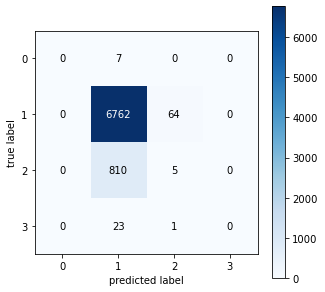

In [79]:
cm=metrics.confusion_matrix(expected, predicted)
fig = plot_confusion_matrix(conf_mat=cm, figsize=(5,5),show_absolute=True,colorbar=True)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_knn = accuracy_score(y_test, predicted ) # Calculating accuracy of prediction
precision_knn = precision_score(y_test, predicted , average='macro') # Calculation of precision
recall = recall_score(y_test,predicted, average='macro') # Calculation of recall
f1 = f1_score(y_test,predicted, average='macro') # Calculation of F1-score
print("Accuracy of KNN :", accuracy_knn)
print("Precision of KNN :", precision_knn)
print("Recall of KNN :", recall)
print("F1 of KNN :", f1)

Accuracy of KNN : 0.8820385818561001
Precision of KNN : 0.24023283346487764
Recall of KNN : 0.24918976342709848
F1 of KNN : 0.23716087206451983


C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
